In [2]:
# Rupesh Nitin Bharambe (AI3007)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
    
    def fit_sgd(self, X, y):
        m = len(y)
        self.theta = np.random.randn(2, 1) # Random initialization
    
        # Add x0 = 1 to each instance
        X_b = np.c_[np.ones((m, 1)), X]
        
        for iteration in range(self.n_iterations):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_b[random_index:random_index + 1]
                yi = y[random_index:random_index + 1]
                gradients = 2 * xi.T.dot(xi.dot(self.theta) - yi)
                self.theta -= self.learning_rate * gradients
        
    def fit_minibatch(self, X, y, batch_size=20):
        m = len(y)
        self.theta = np.random.randn(2, 1) # Random initialization
    
        # Add x0 = 1 to each instance
        X_b = np.c_[np.ones((m, 1)), X]
        
        for iteration in range(self.n_iterations):
            indices = np.random.permutation(m)
            X_b_shuffled = X_b[indices]
            y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            X_mini_batch = X_b_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]
            gradients = 2 / batch_size * X_mini_batch.T.dot(X_mini_batch.dot(self.theta) - y_mini_batch)
            self.theta -= self.learning_rate * gradients
    
    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)

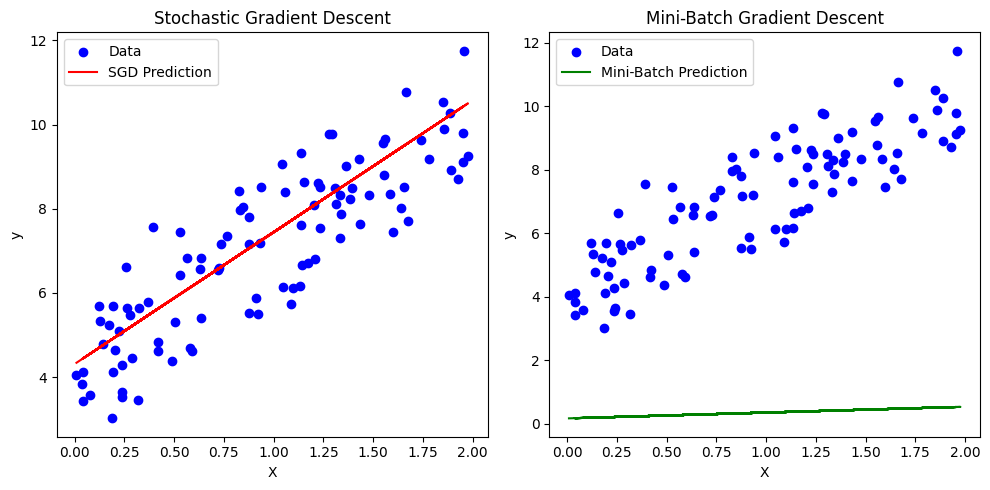

In [25]:
# Stochastic Gradient Descent

sgd_model = LinearRegression(learning_rate=0.01, n_iterations=1000)
sgd_model.fit_sgd(X, y)
sgd_predictions = sgd_model.predict(X)

# Mini-Batch Gradient Descent
mini_batch_model = LinearRegression(learning_rate=0.01, n_iterations=1000)
mini_batch_model.fit_minibatch(X, y, batch_size=20)
mini_batch_predictions = mini_batch_model.predict(X)
# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, sgd_predictions, color='red', label='SGD Prediction')
plt.title('Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, mini_batch_predictions, color='green', label='Mini-Batch Prediction')
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()